# fit a model to real data using exoplanet interior structure models to get a mass-radius relationship

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import interpolate
%matplotlib inline

In [2]:
# load data and create a linear interpolator
# load data from file

mass_a, mass_b, radius_a, radius_b, errors = \
    np.loadtxt('mr_all.dat', skiprows = 21, unpack = True, usecols= (4,5,6,7,8))

pl_mass = mass_a + mass_b
pl_radius = radius_a + radius_b

# remove entries where error was thrown
pl_mass_valid = pl_mass[errors == 0]
pl_radius_valid = pl_radius[errors == 0]

In [3]:
# create a function that for a given mass, computes a radius using linear interpolation
rad_interpol = interpolate.interp1d(pl_mass_valid, pl_radius_valid, kind = 'linear', fill_value = 'extrapolate')

In [4]:
#test the interpolator
mass_test = 2.0
interpolated_radius = rad_interpol(mass_test)
print(f'mass = {mass_test}, radiusinterpolated = {interpolated_radius}')

mass = 2.0, radiusinterpolated = 2.0691786526554066


# define a model function and fit to the data

linear fit with a function that can go throgugh all the data points

In [5]:
# define the fit model
def rad_model(mass, a, b, c, d):
    return 10**(a*np.log10(mass) + np.exp(-d*(np.log10(mass) + c)) + b)

In [6]:
# perform the fit
params, params_cov = optimize.curve_fit(rad_model, pl_mass_valid, pl_radius_valid, p0 = [1, 1, 1, 1])

# define the error array
param_err = np.sqrt(np.diag(params_cov))

# use the fitted parameters to define a best-fit function
def rad_fit(mass):
    return rad_model(mass, params[0], params[1], params[2], params[3])
# alternarively rad_model(mass, **params)

In [7]:
# let's see how good the fit is
n = 500
masses = np.linspace(0.1, 30, n)

#make a guess using interpolator
radii_int = rad_interpol(masses)

#make a guess usign best fit func
radii_fit = rad_fit(masses)

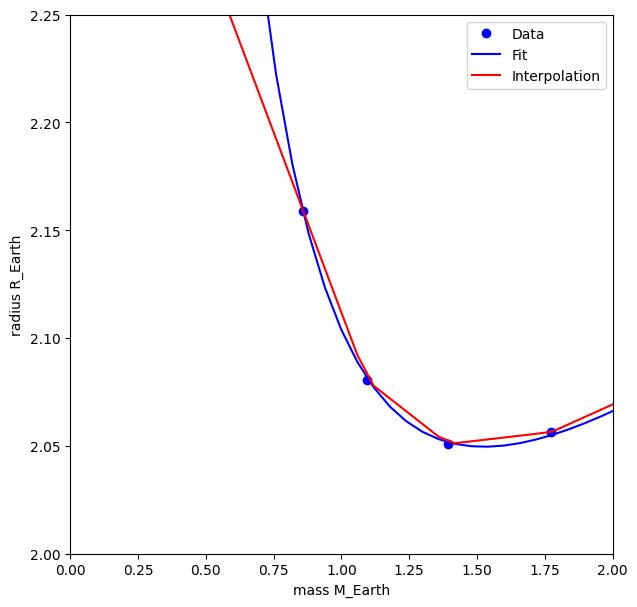

In [8]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)

# plot data

ax.plot(pl_mass_valid, pl_radius_valid, 'bo', label = 'Data')
ax.plot(masses, radii_fit, 'b-', label = 'Fit')
ax.plot(masses, radii_int, 'r-', label = 'Interpolation')

ax.set_xlabel('mass M_Earth')
ax.set_ylabel('radius R_Earth')
ax.legend(loc = 0)
ax.set_ylim(2, 2.25)
ax.set_xlim(0, 2)

plt.show()